In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Optional: Make plots look better
sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv("fuel_econ.csv")

In [8]:
df.head(8)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5


# New Section

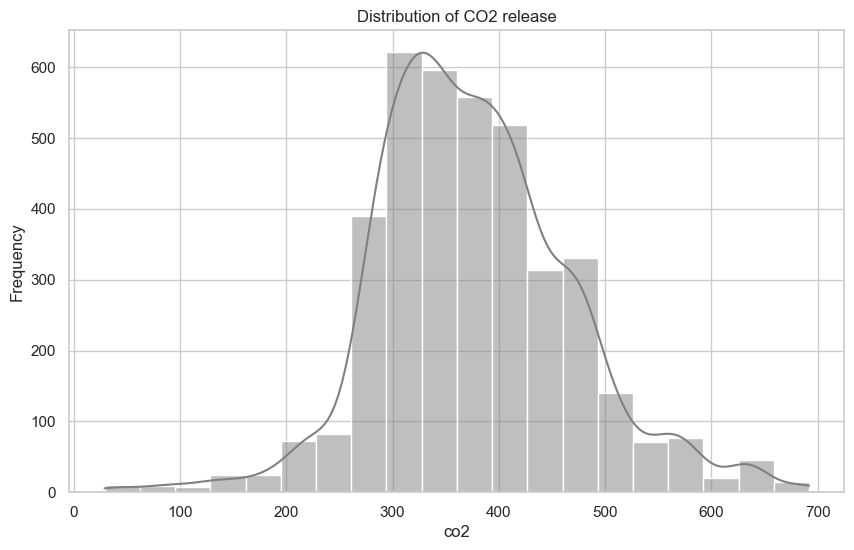

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(df['co2'], bins=20, kde=True, color="grey")
plt.title('Distribution of CO2 release')
plt.ylabel('Frequency')
plt.savefig("histogram_co2.png", dpi=300)
plt.show()


**Interpretation**
The histogram above shows that most vehicles emit CO₂ in the range of 300–450 units, suggesting moderate fuel efficiency. Higher CO₂ emissions generally indicate greater fuel consumption, which could result from larger engines, heavier vehicles, or less efficient combustion systems. Very few vehicles have extremely low emissions (0–250 units), likely representing highly efficient models (e.g., hybrids or electric vehicles). Similarly, very few vehicles emit extremely high CO₂ (600–700 units), indicating poor fuel efficiency, possibly due to outdated engine technology or high-performance designs

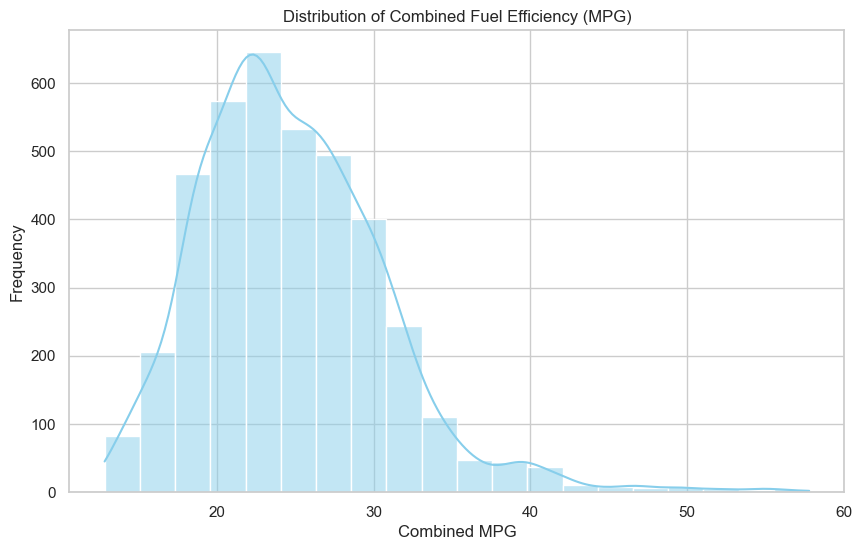

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['comb'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Combined Fuel Efficiency (MPG)')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**:
The histogram shows that most vehicles have a combined MPG between 15 and 30. There is a sharp decline in frequency beyond 30 MPG, indicating that highly fuel-efficient vehicles are less common. This could inform transport policies or incentive programs for higher-efficiency vehicles.


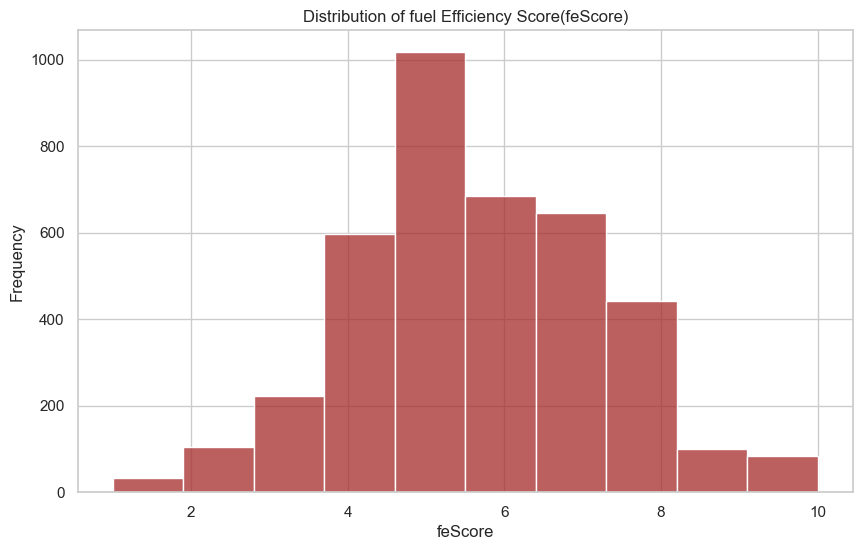

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['feScore'], bins=10, color="brown")
plt.title('Distribution of fuel Efficiency Score(feScore)')
plt.ylabel('Frequency')
plt.savefig("histogram_feScore.png", dpi=300)
plt.show()

**Intepretation**
The histogram above  shows the distribution of vehicle fuel efficiency scores(feScores), revealing that most vehicles fall within a mid-range efficiency level. Approximately 600 vehicles score between 4–4.7, indicating below-average efficiency, while the highest frequency (~1000 vehicles) clusters around 5–5.5, representing average performance. A significant portion of vehicles achieve above-average scores (6–8), and fewer than 200 reach the highest tier (8–10), denoting excellent efficiency. Overall, the data suggests that the majority of vehicles have moderate fuel efficiency, with scores ranging from 4.7 to 7, while extreme highs and lows are less common.

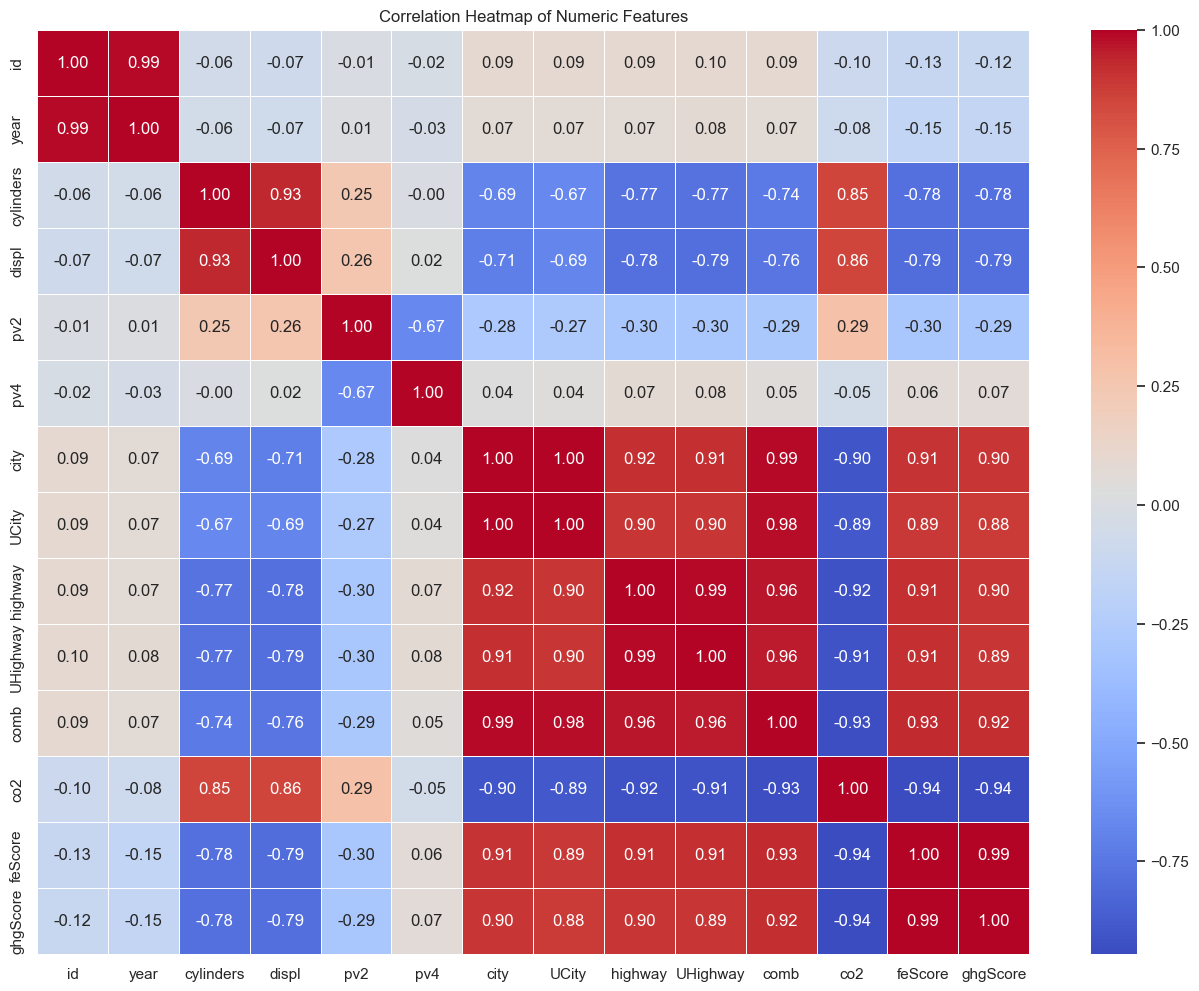

In [51]:
plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Interpretation**:
From the heatmap, we can observe strong negative correlation between `displ` (engine displacement) and `comb` (combined fuel efficiency), and strong positive correlation between `comb` and `feScore` (fuel efficiency score). Columns like `pv2` and `pv4` have near-zero correlation and could potentially be dropped for further AI modeling.



# New Section